In [3]:
import sys

import sqlite3

import numpy as np

import pandas as pd

#import seaborn as sns
import os 


In [4]:
os.chdir("C:\\Users\\jkdadhich\\Desktop\\Text_Enron\\Untitled Folder\\database")
cnx = sqlite3.connect('database.sqlite')

cursor = cnx.cursor()

table_names = cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

print(cursor.fetchall())

[('sqlite_sequence',), ('Player_Attributes',), ('Player',), ('Match',), ('League',), ('Country',), ('Team',), ('Team_Attributes',)]


In [5]:

df_player = pd.read_sql_query("SELECT * FROM Player", cnx)

df_player_att = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

df_match = pd.read_sql_query("SELECT * FROM Match", cnx)

df_league = pd.read_sql_query("SELECT * FROM League", cnx)

df_country = pd.read_sql_query("SELECT * FROM Country", cnx)

df_team = pd.read_sql_query("SELECT * FROM Team", cnx)

df_team_att = pd.read_sql_query("SELECT * FROM Team_Attributes", cnx)

In [6]:
#Analyzing Country Table

print(90*"-")

print("Country Table")

print(df_country.describe())

print(90*"-")

print(df_country.isnull().sum(axis=0))

print(90*"-")

print(df_country)

------------------------------------------------------------------------------------------
Country Table
                 id
count     11.000000
mean   12452.090909
std     8215.308472
min        1.000000
25%     6289.000000
50%    13274.000000
75%    18668.000000
max    24558.000000
------------------------------------------------------------------------------------------
id      0
name    0
dtype: int64
------------------------------------------------------------------------------------------
       id         name
0       1      Belgium
1    1729      England
2    4769       France
3    7809      Germany
4   10257        Italy
5   13274  Netherlands
6   15722       Poland
7   17642     Portugal
8   19694     Scotland
9   21518        Spain
10  24558  Switzerland


In [7]:
#Analyzing League Table

print(90*"-")

print("League Table")

print(df_league.describe())

print(90*"-")

print(df_league.isnull().sum(axis=0))

print(90*"-")

print(df_league)


------------------------------------------------------------------------------------------
League Table
                 id    country_id
count     11.000000     11.000000
mean   12452.090909  12452.090909
std     8215.308472   8215.308472
min        1.000000      1.000000
25%     6289.000000   6289.000000
50%    13274.000000  13274.000000
75%    18668.000000  18668.000000
max    24558.000000  24558.000000
------------------------------------------------------------------------------------------
id            0
country_id    0
name          0
dtype: int64
------------------------------------------------------------------------------------------
       id  country_id                      name
0       1           1    Belgium Jupiler League
1    1729        1729    England Premier League
2    4769        4769            France Ligue 1
3    7809        7809     Germany 1. Bundesliga
4   10257       10257             Italy Serie A
5   13274       13274    Netherlands Eredivisie
6   15722  

In [8]:
#Analyzing Team Table

print(90*"-")

print(df_team.describe())

print(90*"-")

print(df_team.isnull().sum(axis=0))

print(df_team[df_team.loc[:,'team_fifa_api_id'].isnull()])

df_team_updated = df_team[~df_team.loc[:,'team_fifa_api_id'].isnull()]

my_team = dict()

for i,j in list(df_team_updated.iloc[:,3:].groupby('team_short_name')):

    my_team[i] = j.iloc[:,0].values.tolist()

#List of teams with similar short team names 

print("List of teams with similar short team names") 

print("List of teams with similar short team names") 

print("List of teams with similar short team names")    

print({k:v for k,v in my_team.items() if len(v) > 1})

------------------------------------------------------------------------------------------
                 id    team_api_id  team_fifa_api_id
count    299.000000     299.000000        288.000000
mean   23735.301003   12340.521739      21534.305556
std    15167.914719   25940.411135      42456.439408
min        1.000000    1601.000000          1.000000
25%     9552.500000    8349.000000        178.750000
50%    22805.000000    8655.000000        673.500000
75%    36250.500000    9886.500000       1910.750000
max    51606.000000  274581.000000     112513.000000
------------------------------------------------------------------------------------------
id                   0
team_api_id          0
team_fifa_api_id    11
team_long_name       0
team_short_name      0
dtype: int64
        id  team_api_id  team_fifa_api_id                team_long_name  \
8        9         7947               NaN                 FCV Dender EH   
14      15         4049               NaN                      

In [9]:
#Analyzing Team Attributes Table

print(90*"-")

print(df_team_att.describe())

print(90*"-")

print(df_team_att.isnull().sum(axis=0))



df_team_att_updated1 = df_team_att.drop(['buildUpPlayDribbling'],axis = 1)



tat = df_team_att_updated1.loc[:,df_team_att_updated1.columns.tolist()[3:]]

------------------------------------------------------------------------------------------
                id  team_fifa_api_id    team_api_id  buildUpPlaySpeed  \
count  1458.000000       1458.000000    1458.000000       1458.000000   
mean    729.500000      17706.982167    9995.727023         52.462277   
std     421.032659      39179.857739   13264.869900         11.545869   
min       1.000000          1.000000    1601.000000         20.000000   
25%     365.250000        110.000000    8457.750000         45.000000   
50%     729.500000        485.000000    8674.000000         52.000000   
75%    1093.750000       1900.000000    9904.000000         62.000000   
max    1458.000000     112513.000000  274581.000000         80.000000   

       buildUpPlayDribbling  buildUpPlayPassing  chanceCreationPassing  \
count            489.000000         1458.000000            1458.000000   
mean              48.607362           48.490398              52.165295   
std                9.678290  

In [14]:
#Analyzing Player Table

print(90*"~")

print(df_player.describe())

print(90*"~")

print(df_player.isnull().sum(axis=0))





~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                 id  player_api_id  player_fifa_api_id        height  \
count  11060.000000   11060.000000        11060.000000  11060.000000   
mean    5537.511392  156582.427215       165664.910488    181.867445   
std     3197.692647  160713.700624        58649.928360      6.369201   
min        1.000000    2625.000000            2.000000    157.480000   
25%     2767.750000   35555.500000       151889.500000    177.800000   
50%     5536.500000   96619.500000       184671.000000    182.880000   
75%     8306.250000  212470.500000       203883.250000    185.420000   
max    11075.000000  750584.000000       234141.000000    208.280000   

             weight  
count  11060.000000  
mean     168.380289  
std       14.990217  
min      117.000000  
25%      159.000000  
50%      168.000000  
75%      179.000000  
max      243.000000  
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [17]:
print("Cardinality of Feature: Height - {:0.3f}%".format( \

        100 * (len(np.unique(df_player.loc[:,'height'])) / len(df_player.loc[:,'height']))))

print("Cardinality of Feature: Weight - {:0.3f}%".format( \

        100 * (len(np.unique(df_player.loc[:,'weight'])) / len(df_player.loc[:,'weight']))))



#Analyzing Player Attributes Table

print(90*"~")

print(df_player_att.describe())



Cardinality of Feature: Height - 0.181%
Cardinality of Feature: Weight - 0.452%
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                 id  player_fifa_api_id  player_api_id  overall_rating  \
count  183978.00000       183978.000000  183978.000000   183142.000000   
mean    91989.50000       165671.524291  135900.617324       68.600015   
std     53110.01825        53851.094769  136927.840510        7.041139   
min         1.00000            2.000000    2625.000000       33.000000   
25%     45995.25000       155798.000000   34763.000000       64.000000   
50%     91989.50000       183488.000000   77741.000000       69.000000   
75%    137983.75000       199848.000000  191080.000000       73.000000   
max    183978.00000       234141.000000  750584.000000       94.000000   

           potential       crossing      finishing  heading_accuracy  \
count  183142.000000  183142.000000  183142.000000     183142.000000   
mean       73.4603

In [16]:
print(90*"~")

print(df_player_att.isnull().sum(axis=0))



print(np.unique(df_player_att.dtypes.values))

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision       

In [23]:
corr2 = df_player_att.select_dtypes(include =['float64','int64']).loc[:,df_player_att.select_dtypes(include =['float64','int64']).columns[3:]].corr()



print(df_player_att['attacking_work_rate'].value_counts())

print(100*'~')

print(df_player_att['defensive_work_rate'].value_counts())

print(100*'~')

medium    125070
high       42823
low         8569
None        3639
norm         348
y            106
le           104
stoc          89
Name: attacking_work_rate, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
medium    130846
high       27041
low        18432
_0          2394
o           1550
1            441
ormal        348
2            342
3            258
5            234
7            217
0            197
6            197
9            152
4            116
es           106
ean          104
tocky         89
8             78
Name: defensive_work_rate, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [25]:
df_player_att.loc[~(df_player_att['attacking_work_rate'].\

                                                  isin(['medium','high','low'])\

                       | df_player_att['defensive_work_rate'].isin(['medium','high','low'])),:].head()

df_player_att_updated1 = df_player_att.loc[(df_player_att['attacking_work_rate'].\

                                                  isin(['medium','high','low'])\

                       & df_player_att['defensive_work_rate'].isin(['medium','high','low'])),:]

In [26]:

att_work_rate = df_player_att_updated1.groupby('attacking_work_rate').size().values.tolist()

def_work_rate = df_player_att_updated1.groupby('defensive_work_rate').size().values.tolist()

In [27]:
print("Attacking work rate factor, Medium, accounts for: {:0.3f}% of features".format(100 * att_work_rate[2]/np.sum(att_work_rate)))

print("Defensive work rate factor, Medium, accounts for: {:0.3f}% of features".format(100 * def_work_rate[2]/np.sum(def_work_rate)))



Attacking work rate factor, Medium, accounts for: 70.885% of features
Defensive work rate factor, Medium, accounts for: 74.230% of features


C:\Users\jkdadhich\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\jkdadhich\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\jkdadhich\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\jkdadhich\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The '

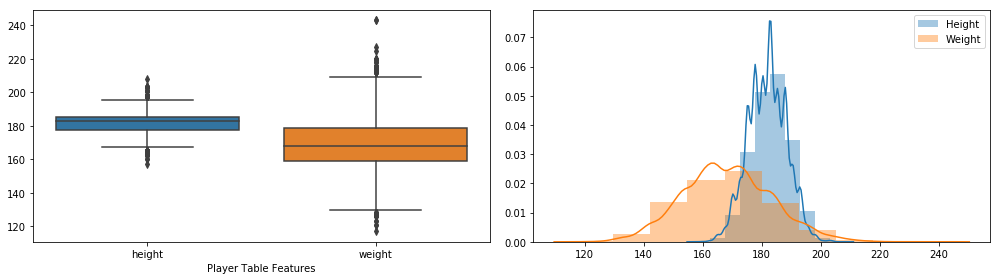

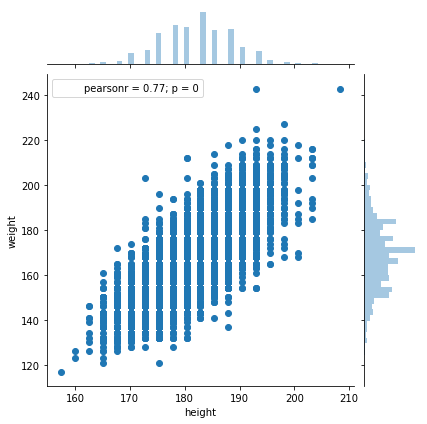

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
fig1, ax1 = plt.subplots(nrows = 1, ncols = 2)

fig1.set_size_inches(14,4)

sns.boxplot(data = df_player.loc[:,["height",'weight']], ax = ax1[0])

ax1[0].set_xlabel('Player Table Features')

ax1[0].set_ylabel('')

sns.distplot(a = df_player.loc[:,["height"]], bins= 10, kde = True, ax = ax1[1], \

            label = 'Height')

sns.distplot(a = df_player.loc[:,["weight"]], bins= 10, kde = True, ax = ax1[1], \

            label = 'Weight')

ax1[1].legend()

sns.jointplot(x='height',y = 'weight',data = df_player,kind = 'scatter')

fig1.tight_layout()

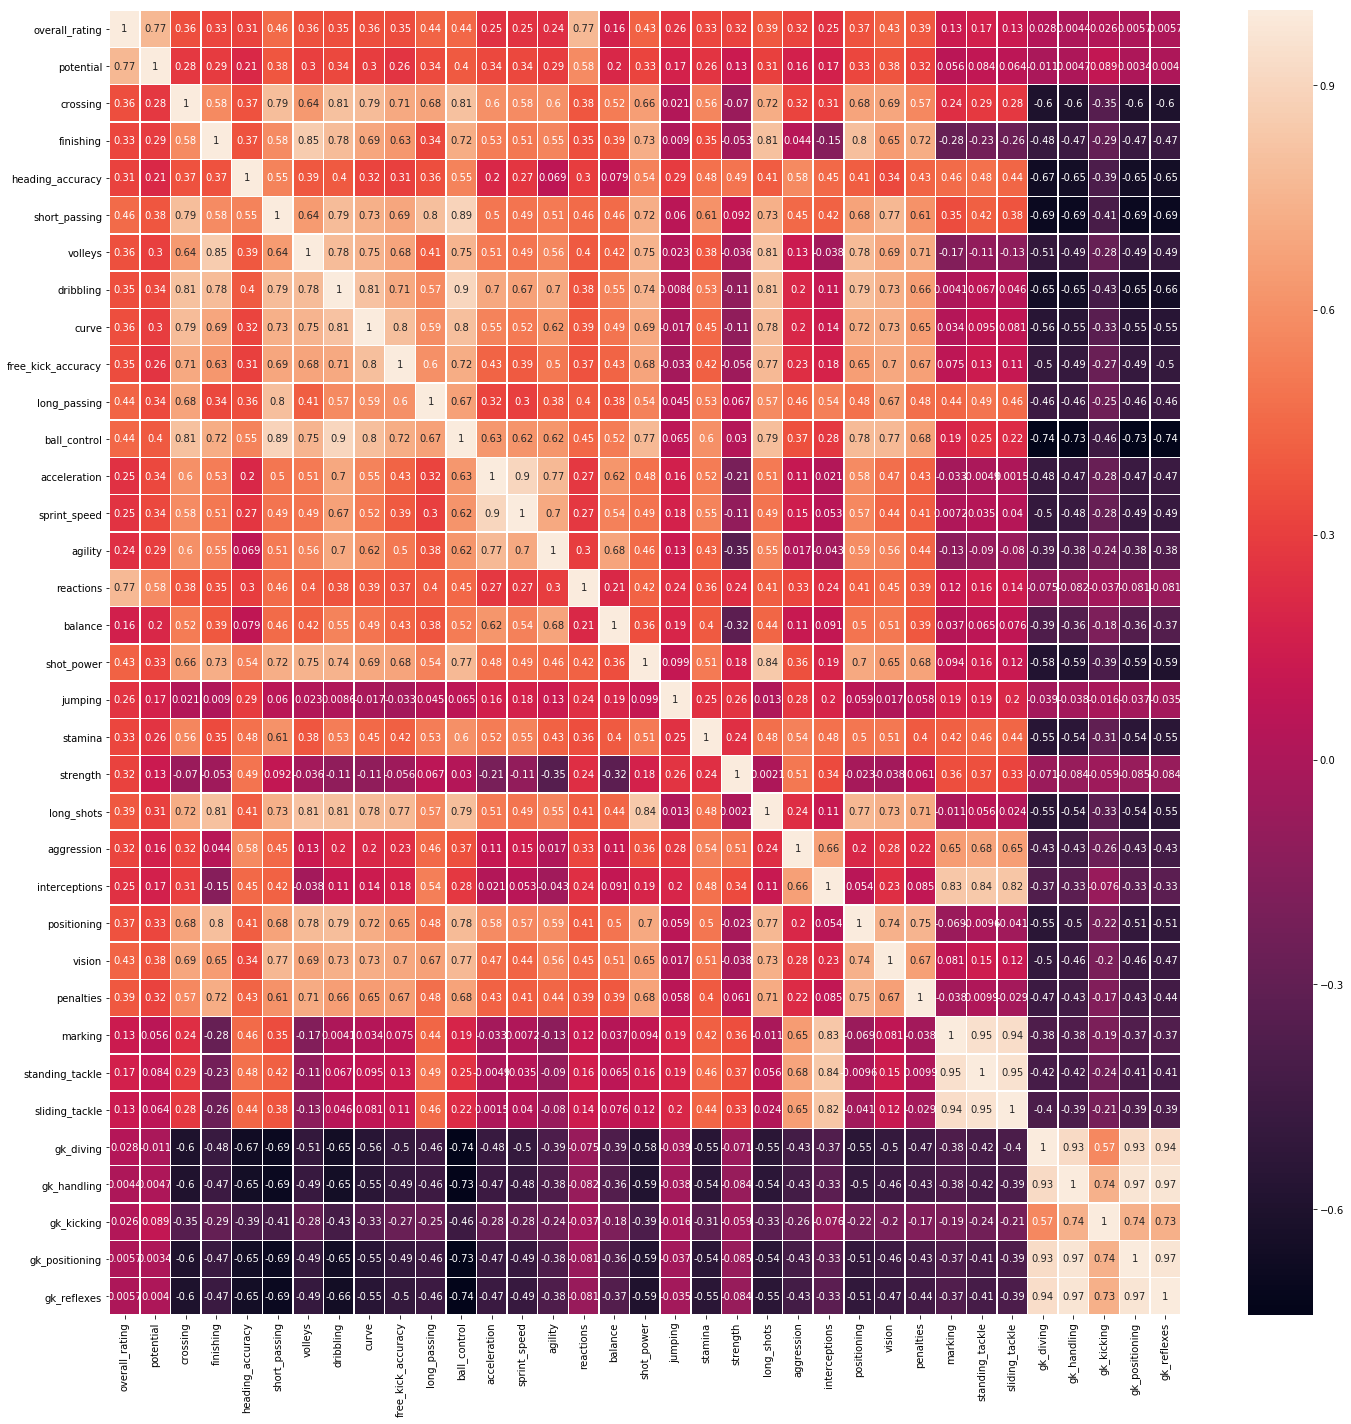

In [31]:
fig2,ax2 = plt.subplots(nrows = 1,ncols = 1)

fig2.set_size_inches(w=24,h=24)

sns.heatmap(corr2,annot = True,linewidths=0.5,ax = ax2)



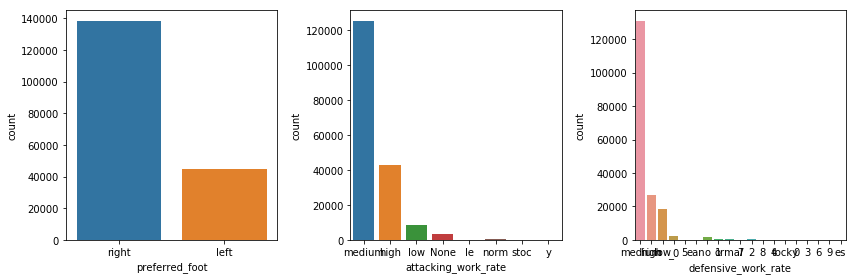

In [32]:
fig3, ax3 = plt.subplots(nrows = 1, ncols = 3)

fig3.set_size_inches(12,4)

sns.countplot(x = df_player_att['preferred_foot'],ax = ax3[0])

sns.countplot(x = df_player_att['attacking_work_rate'],ax = ax3[1])

sns.countplot(x = df_player_att['defensive_work_rate'],ax = ax3[2])

fig3.tight_layout()

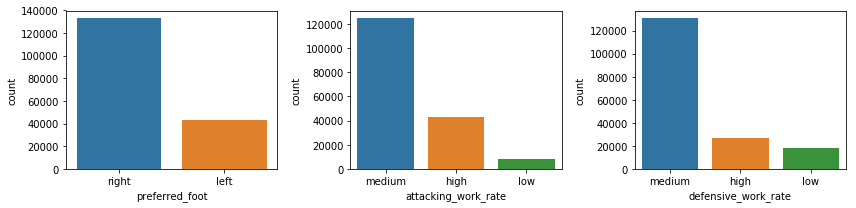

In [33]:
fig4, ax4 = plt.subplots(nrows = 1, ncols = 3)

fig4.set_size_inches(12,3)

sns.countplot(x = df_player_att_updated1['preferred_foot'],ax = ax4[0])

sns.countplot(x = df_player_att_updated1['attacking_work_rate'],ax = ax4[1])

sns.countplot(x = df_player_att_updated1['defensive_work_rate'],ax = ax4[2])

fig4.tight_layout()

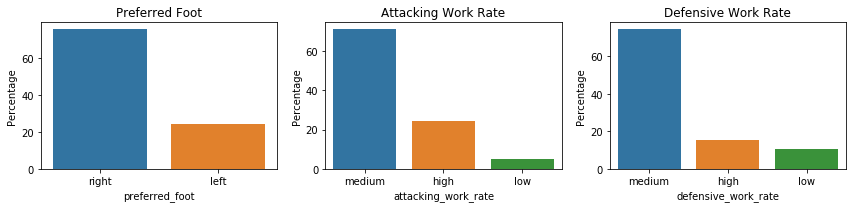

In [36]:
fig4, ax4 = plt.subplots(nrows = 1, ncols = 3)

fig4.set_size_inches(12,3)

sns.barplot(x ='preferred_foot', y = 'preferred_foot', data = df_player_att_updated1,\

            estimator = lambda x: len(x)/len(df_player_att_updated1) * 100, ax = ax4[0],\

           orient = 'v')

ax4[0].set(ylabel = 'Percentage',title = 'Preferred Foot')

sns.barplot(x ='attacking_work_rate', y = 'attacking_work_rate', data = df_player_att_updated1,\

            estimator = lambda x: len(x)/len(df_player_att_updated1) * 100, ax = ax4[1],\

           orient = 'v')

ax4[1].set(ylabel = 'Percentage',title = 'Attacking Work Rate')

sns.barplot(x ='defensive_work_rate', y = 'defensive_work_rate', data = df_player_att_updated1,\

            estimator = lambda x: len(x)/len(df_player_att_updated1) * 100, ax = ax4[2],\

           orient = 'v')

ax4[2].set(ylabel = 'Percentage',title = 'Defensive Work Rate')

fig4.tight_layout()

C:\Users\jkdadhich\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\jkdadhich\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\jkdadhich\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\jkdadhich\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The '

C:\Users\jkdadhich\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


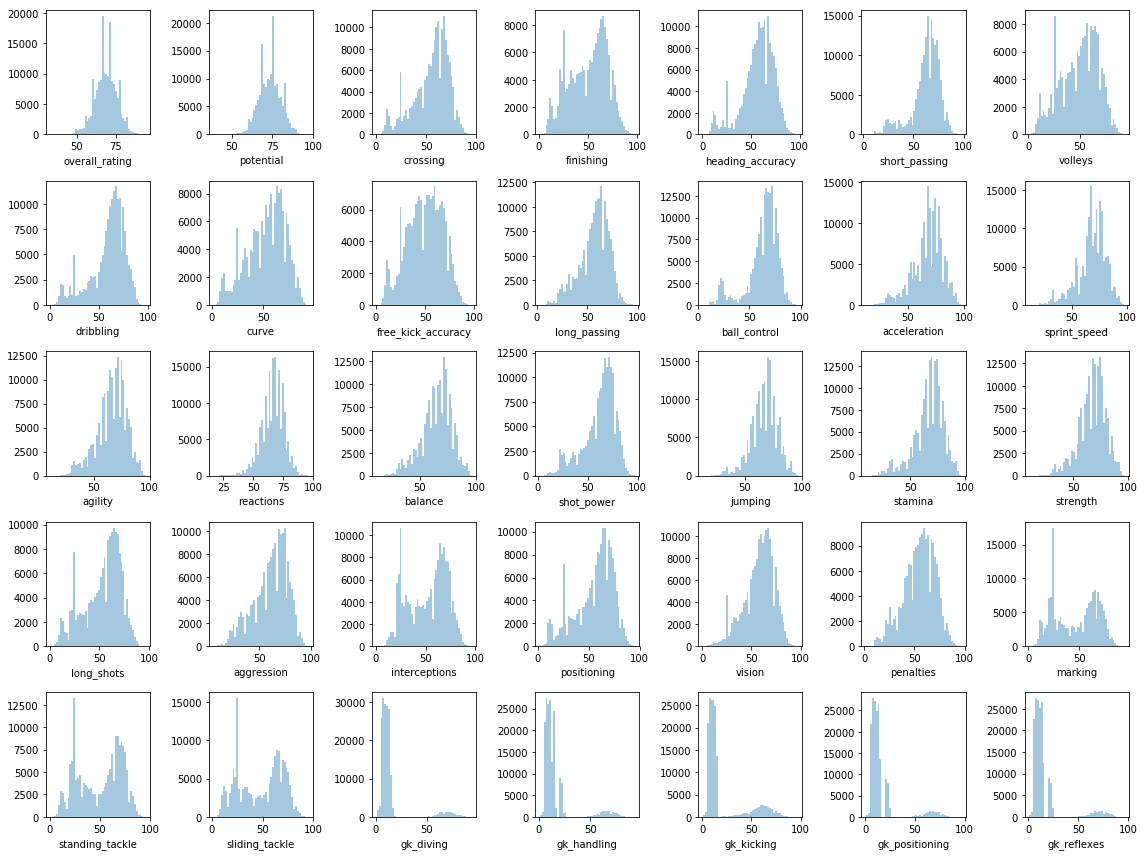

In [38]:
pat = df_player_att_updated1.loc[:,df_player_att_updated1.columns.tolist()[3:]]
fig5, ax5 = plt.subplots(nrows=5,ncols=7)

fig5.set_size_inches(16,12)

for i,j in enumerate(df_player_att_updated1.select_dtypes(include = ['float64','int64']).columns[3:].tolist()):

    sns.distplot(pat.loc[:,j],kde = False,hist = True, ax = ax5[int(i/7)][i%7])

fig5.tight_layout()



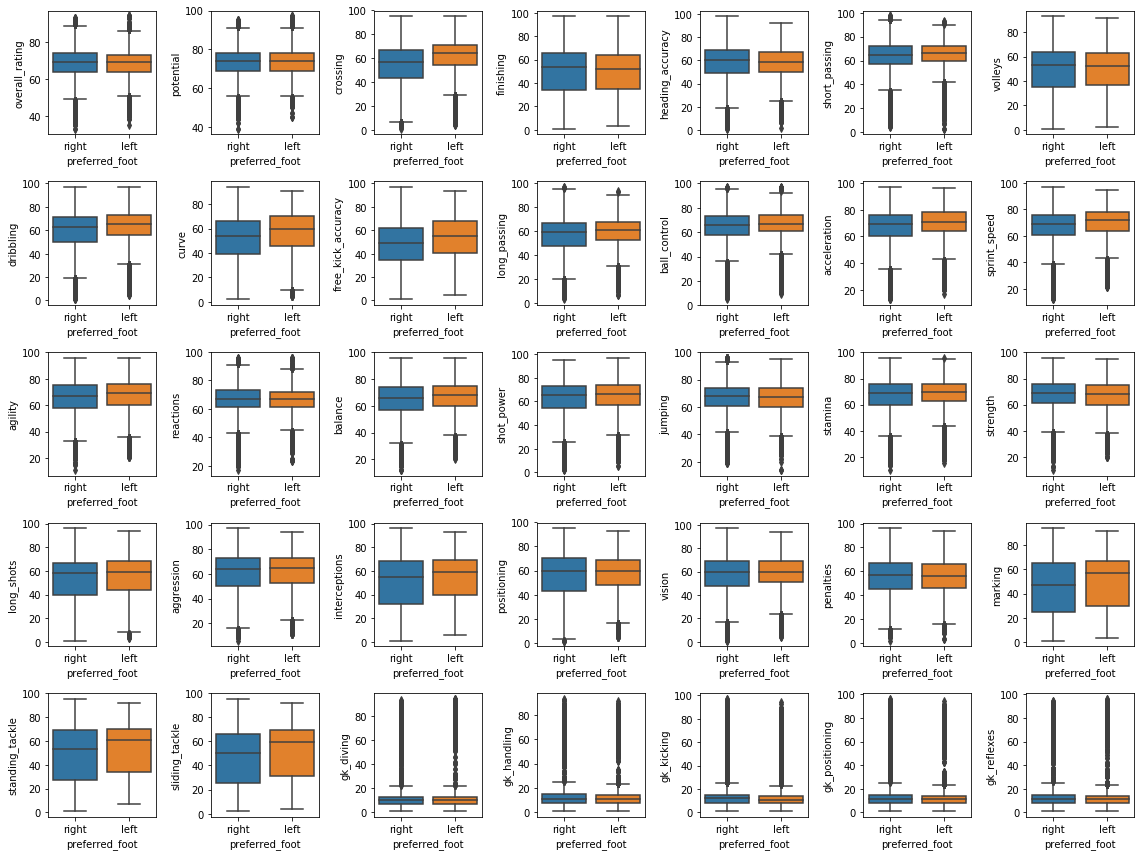

In [40]:
fig6, ax6 = plt.subplots(nrows=5,ncols=7)

fig6.set_size_inches(16,12)

for i,j in enumerate(df_player_att_updated1.select_dtypes(include = ['float64','int64']).columns[3:].tolist()):

    sns.boxplot(x = "preferred_foot", y = j, data= pat, ax = ax6[int(i/7)][i%7])

fig6.tight_layout()



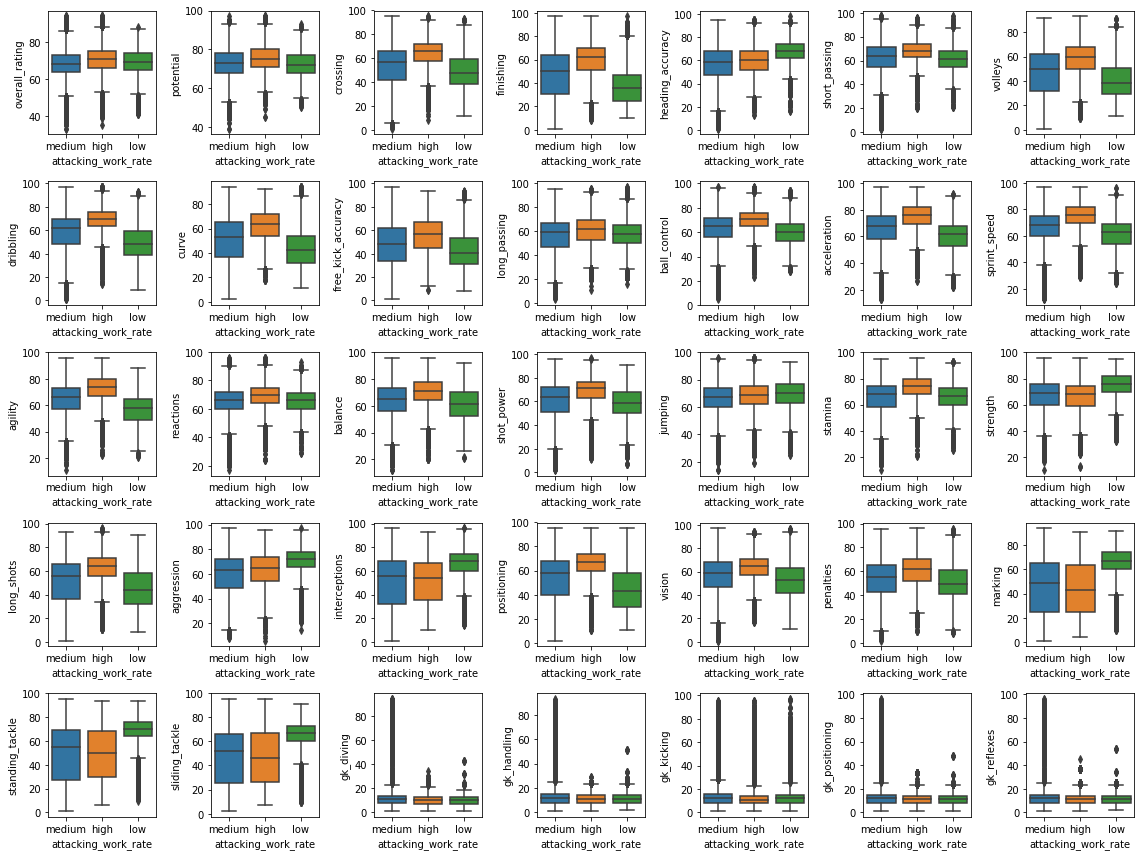

In [41]:
fig7, ax7 = plt.subplots(nrows=5,ncols=7)

fig7.set_size_inches(16,12)

for i,j in enumerate(df_player_att_updated1.select_dtypes(include = ['float64','int64']).columns[3:].tolist()):

    sns.boxplot(x = "attacking_work_rate", y = j, data= pat, ax = ax7[int(i/7)][i%7])

fig7.tight_layout()

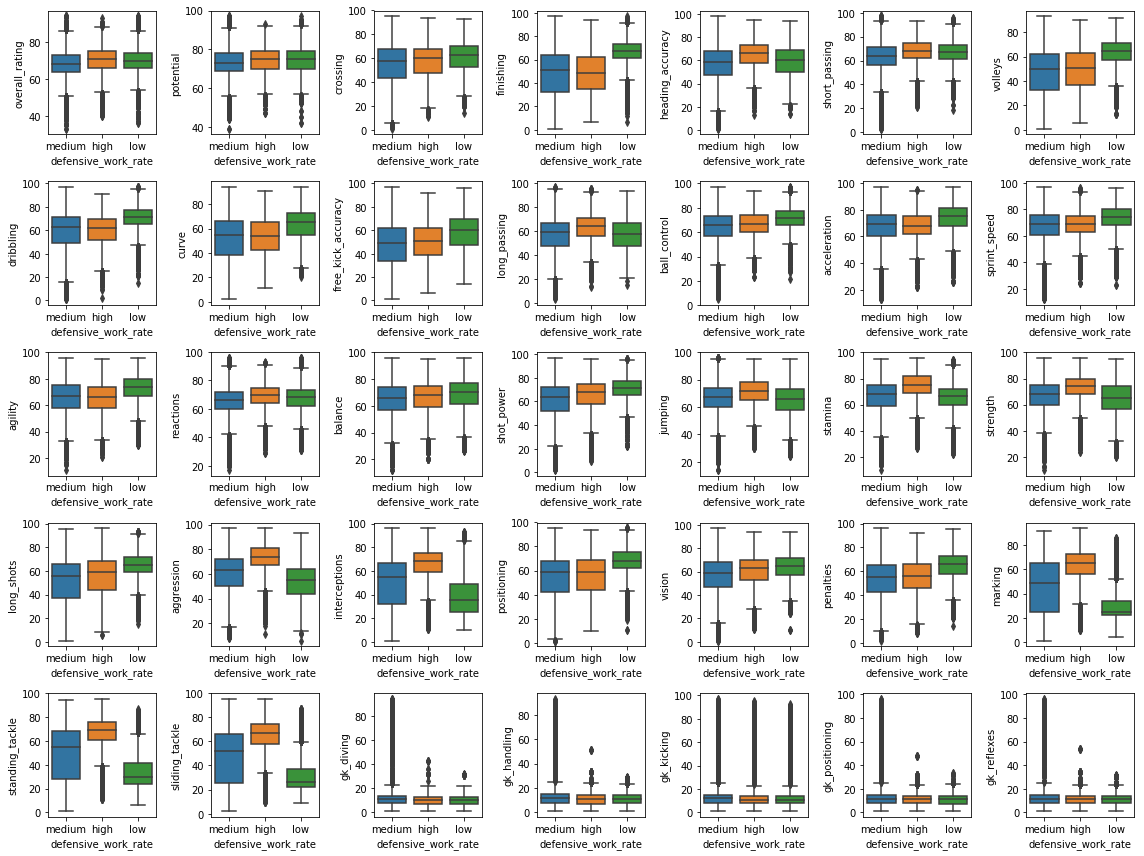

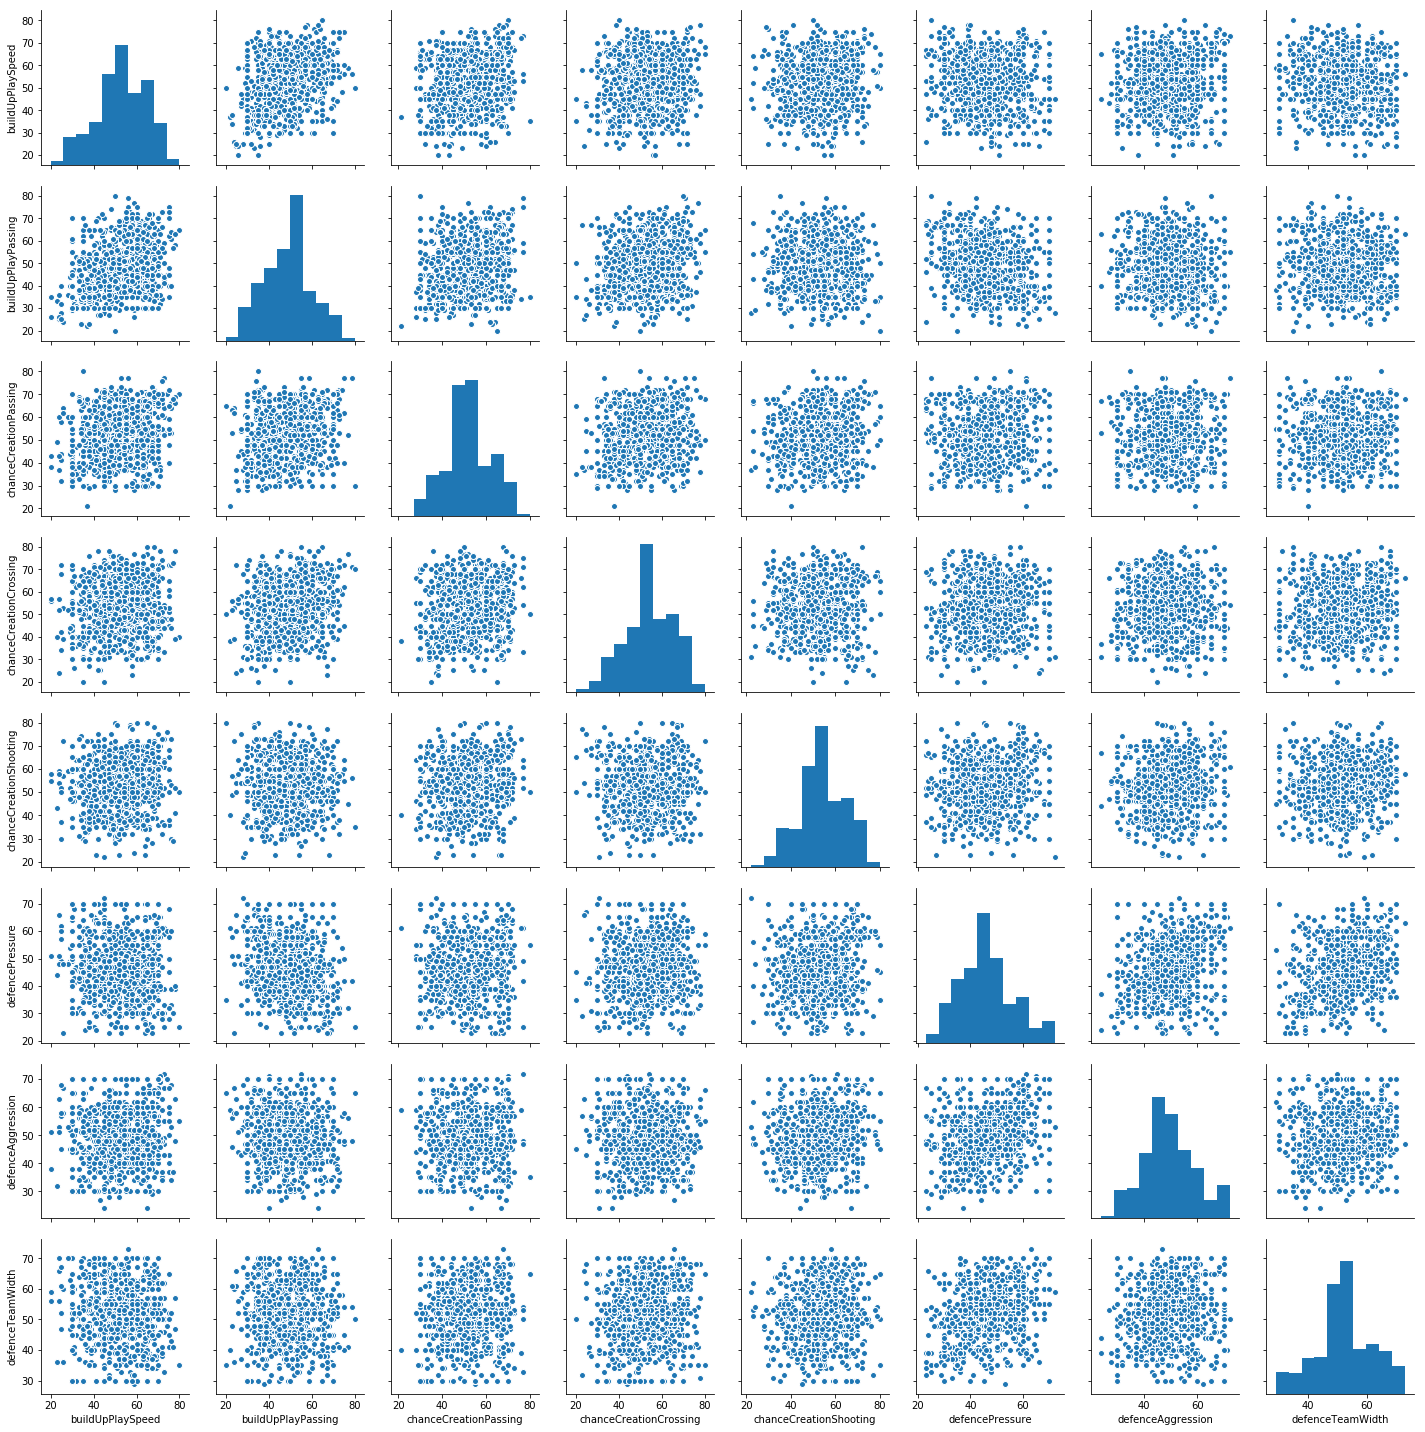

In [42]:
fig8, ax8 = plt.subplots(nrows=5,ncols=7)

fig8.set_size_inches(16,12)

for i,j in enumerate(df_player_att_updated1.select_dtypes(include = ['float64','int64']).columns[3:].tolist()):

    sns.boxplot(x = "defensive_work_rate", y = j, data= pat, ax = ax8[int(i/7)][i%7])

fig8.tight_layout()



# Team Attribute Table - Correlation of continuous features

sns.pairplot(tat)

C:\Users\jkdadhich\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\jkdadhich\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\jkdadhich\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\jkdadhich\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The '

,id,team_fifa_api_id,team_api_id,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
0,1,434,9930,60,50,60,65,55,50,55,45
1,2,434,9930,52,56,54,63,64,47,44,54
2,3,434,9930,47,54,54,63,64,47,44,54
3,4,77,8485,70,70,70,70,70,60,70,70
4,5,77,8485,47,52,53,48,52,47,47,52


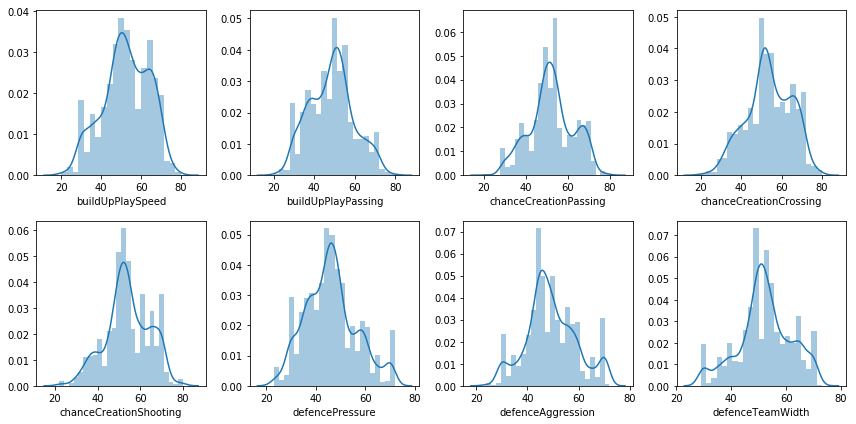

In [43]:
fig9, ax9 = plt.subplots(nrows=2,ncols=4)

fig9.set_size_inches(12,6)

for i,j in enumerate(df_team_att_updated1.select_dtypes(include = ['int64']).columns[3:].tolist()):

    sns.distplot(tat.loc[:,j],kde =True,hist = True, ax = ax9[int(i/4)][i%4])

fig9.tight_layout()



df_team_att_updated1.select_dtypes(include = ['int64']).head()

In [44]:
tat.select_dtypes(include = ['int64']).columns.tolist()

['buildUpPlaySpeed',
 'buildUpPlayPassing',
 'chanceCreationPassing',
 'chanceCreationCrossing',
 'chanceCreationShooting',
 'defencePressure',
 'defenceAggression',
 'defenceTeamWidth']

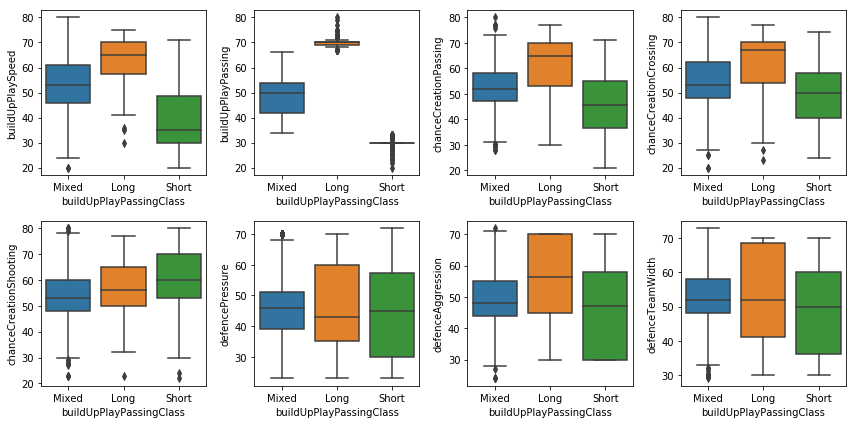

In [45]:
fig9, ax9 = plt.subplots(nrows=2,ncols=4)

fig9.set_size_inches(12,6)

for i,j in enumerate(df_team_att_updated1.select_dtypes(include = ['int64']).columns[3:].tolist()):

    sns.boxplot(data = tat, y = j, x = tat.select_dtypes(include = ['object']).columns[3],\

                                                      ax = ax9[int(i/4)][i%4])

fig9.tight_layout()